In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.svm import SVC
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE



In [3]:
DataRPS_N = pd.read_csv("RPS_N.csv",low_memory=False)
DataRPS_RedFlags = pd.read_csv("RPS_RedFlags.csv",low_memory=False)

DataRPS_N = DataRPS_N.drop(['Unnamed: 0'], axis=1)
DataRPS_RedFlags = DataRPS_RedFlags.drop(['Unnamed: 0'], axis=1)

# SMOTE_norm

X_n = DataRPS_N.drop('Status', axis=1)
y_n = DataRPS_N['Status']

X_trainn, X_testn, y_trainn, y_testn = train_test_split(X_n, y_n, test_size=0.2)

smote = SMOTE(random_state=17)

X_trainn, y_trainn = smote.fit_resample(X_trainn, y_trainn)
#X_testn, y_testn = smote.fit_resample(X_testn, y_testn)

# SMOTE_red

X_r = DataRPS_RedFlags.drop('Status', axis=1)
y_r = DataRPS_RedFlags['Status']

X_trainp, X_testp, y_trainp, y_testp = train_test_split(X_r, y_r, test_size=0.2)

smote = SMOTE(random_state=17)

X_trainp, y_trainp = smote.fit_resample(X_trainp, y_trainp)
#X_testp, y_testp = smote.fit_resample(X_testp, y_testp)

In [4]:
print(DataRPS_N.shape)
print(DataRPS_RedFlags.shape)

(1540386, 34)
(1540386, 40)


In [5]:
print(y_trainp.shape)
print(y_testp.shape)

(2410824,)
(308078,)


In [6]:
print(y_trainn.shape)
print(y_testn.shape)

(2411288,)
(308078,)


In [7]:
print(y_trainn.value_counts())
print(y_testn.value_counts())

0    1205644
1    1205644
Name: Status, dtype: int64
0    301248
1      6830
Name: Status, dtype: int64


In [8]:
print(y_trainp.value_counts())
print(y_testp.value_counts())

0    1205412
1    1205412
Name: Status, dtype: int64
0    301480
1      6598
Name: Status, dtype: int64


# Paqueterias

## Random Forest

### IMCO

In [9]:
{'n_estimators': 4000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
IMCO_rf_norm = RandomForestClassifier(n_estimators=4000,
                                      min_samples_split=10,
                                      min_samples_leaf=2,
                                      max_features='sqrt',
                                      max_depth=80,
                                      bootstrap=False)
IMCO_rf_norm.fit(X_trainn,y_trainn)
IMCOy_pred_rand_norm = IMCO_rf_norm.predict(X_testn)

print('RANDOM FOREST NORMAL DATA')
print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testn,IMCOy_pred_rand_norm))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testn, IMCOy_pred_rand_norm))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testn, IMCOy_pred_rand_norm))


RANDOM FOREST NORMAL DATA
TEST PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    301248
           1       0.99      0.70      0.82      6830

    accuracy                           0.99    308078
   macro avg       0.99      0.85      0.91    308078
weighted avg       0.99      0.99      0.99    308078

CONFUSION MATRIX
[[301184     64]
 [  2041   4789]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.8504794267657186


<Axes: >

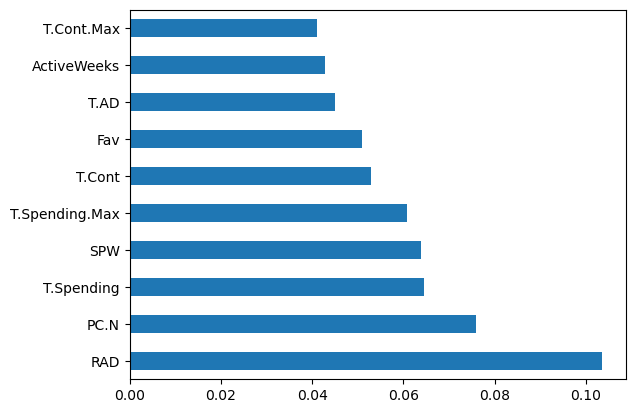

In [10]:
feat_importances_norm = pd.Series(IMCO_rf_norm.feature_importances_, index=X_trainn.columns)
feat_importances_norm.nlargest(10).plot(kind='barh')

In [11]:
# {'n_estimators': 2500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
IMCO_rf_red = RandomForestClassifier(n_estimators=4000,
                                      min_samples_split=5,
                                      min_samples_leaf=2,
                                      max_features='sqrt',
                                      max_depth=50,
                                      bootstrap=False)
IMCO_rf_red.fit(X_trainp,y_trainp)
IMCOy_pred_rand_red = IMCO_rf_red.predict(X_testp)


print('RANDOM FOREST RED FLAG DATA')
print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testp,IMCOy_pred_rand_red))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testp, IMCOy_pred_rand_red))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testp, IMCOy_pred_rand_red))



RANDOM FOREST RED FLAG DATA
TEST PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    301480
           1       0.99      0.74      0.84      6598

    accuracy                           0.99    308078
   macro avg       0.99      0.87      0.92    308078
weighted avg       0.99      0.99      0.99    308078

CONFUSION MATRIX
[[301418     62]
 [  1746   4852]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.8675843518745936


<Axes: >

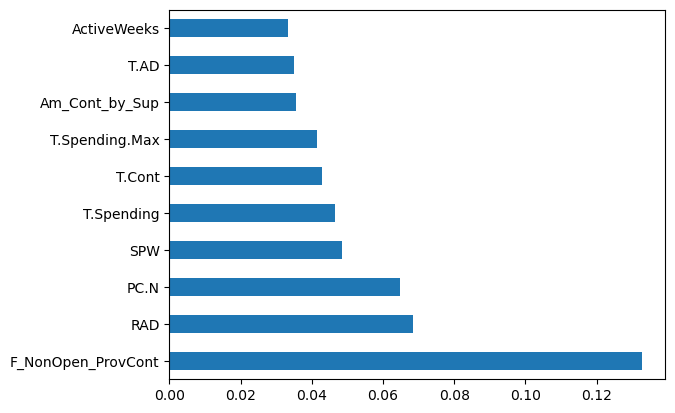

In [12]:

feat_importances_red = pd.Series(IMCO_rf_red.feature_importances_, index=X_trainp.columns)
feat_importances_red.nlargest(10).plot(kind='barh')

# XGBOOSTCLASSIFIER

In [13]:
import sys

!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier

In [14]:
# {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 11, 'learning_rate': 0.1}

IMCO_XGBC_norm = XGBClassifier(subsample=0.9,
                          n_estimators=300,
                          max_depth=11,
                          learning_rate=0.1)

IMCO_XGBC_norm.fit(X_trainn, y_trainn)

IMCO_pred_xgbc_norm = IMCO_XGBC_norm.predict(X_testn)

print('XGBOOST CLASSIFIER NORMAL DATA')
print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testn, IMCO_pred_xgbc_norm))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testn, IMCO_pred_xgbc_norm))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testn, IMCO_pred_xgbc_norm))

XGBOOST CLASSIFIER NORMAL DATA
TEST PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    301248
           1       0.97      0.74      0.84      6830

    accuracy                           0.99    308078
   macro avg       0.98      0.87      0.92    308078
weighted avg       0.99      0.99      0.99    308078

CONFUSION MATRIX
[[301074    174]
 [  1769   5061]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.870209005208902


In [15]:
# {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 11, 'learning_rate': 0.1}
IMCO_XGBC_red = XGBClassifier(subsample=0.8,
                          n_estimators=300,
                          max_depth=11,
                          learning_rate=0.1)


IMCO_XGBC_red.fit(X_trainp, y_trainp)

IMCO_pred_xgbc_red = IMCO_XGBC_red.predict(X_testp)

print('XGBOOST CLASSIFIER PREPROCESSED & RED DATA')
print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testp, IMCO_pred_xgbc_red))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testp, IMCO_pred_xgbc_red))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testp, IMCO_pred_xgbc_red))


XGBOOST CLASSIFIER PREPROCESSED & RED DATA
TEST PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    301480
           1       0.98      0.76      0.86      6598

    accuracy                           0.99    308078
   macro avg       0.99      0.88      0.93    308078
weighted avg       0.99      0.99      0.99    308078

CONFUSION MATRIX
[[301382     98]
 [  1565   5033]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.8812409240813924


#  EXTRATREESCLASSIFIER

In [16]:

# {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
IMCO_ETC_norm = ExtraTreesClassifier(n_estimators=500,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     max_depth=None)

IMCO_ETC_norm.fit(X_trainn, y_trainn)

IMCO_pred_etc_norm = IMCO_ETC_norm.predict(X_testn)

print('EXTRATREESCLASSIFIER NORMAL DATA')
print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testn, IMCO_pred_etc_norm))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testn, IMCO_pred_etc_norm))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testn, IMCO_pred_etc_norm))

EXTRATREESCLASSIFIER NORMAL DATA
TEST PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    301248
           1       0.95      0.71      0.81      6830

    accuracy                           0.99    308078
   macro avg       0.97      0.85      0.90    308078
weighted avg       0.99      0.99      0.99    308078

CONFUSION MATRIX
[[300966    282]
 [  1975   4855]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.854949223820415


In [17]:
# {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}

IMCO_ETC_red = ExtraTreesClassifier(n_estimators=500,
                                     min_samples_split=10,
                                     min_samples_leaf=1,
                                     max_depth=None)

IMCO_ETC_red.fit(X_trainp, y_trainp)

IMCO_pred_etc_red = IMCO_ETC_red.predict(X_testp)

print('EXTRATREESCLASSIFIER REDFLAGS DATA')
print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testp, IMCO_pred_etc_red))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testp, IMCO_pred_etc_red))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testp, IMCO_pred_etc_red))

EXTRATREESCLASSIFIER REDFLAGS DATA
TEST PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    301480
           1       0.99      0.70      0.82      6598

    accuracy                           0.99    308078
   macro avg       0.99      0.85      0.91    308078
weighted avg       0.99      0.99      0.99    308078

CONFUSION MATRIX
[[301412     68]
 [  1959   4639]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.8514331460400087


# MULTILAYER PERCEPTRON

In [18]:
# {'solver': 'adam', 'max_iter': 300, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'relu'}
IMCO_MLP_norm = MLPClassifier(solver='adam',
                    max_iter=300,
                    learning_rate='adaptive',
                    hidden_layer_sizes=(100,),
                    alpha=0.001,
                    activation='relu')

# Perform randomized search with cross-validation

IMCO_MLP_norm.fit(X_trainn, y_trainn)

IMCO_pred_mlpc_norm = IMCO_MLP_norm.predict(X_testn)

print('MLP NORMAL DATA')
print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testn, IMCO_pred_mlpc_norm))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testn, IMCO_pred_mlpc_norm))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testn, IMCO_pred_mlpc_norm))

MLP NORMAL DATA
TEST PERFORMANCE
------------------------------------------------------------


c:\Users\permi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\permi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\permi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    301248
           1       0.02      1.00      0.04      6830

    accuracy                           0.02    308078
   macro avg       0.01      0.50      0.02    308078
weighted avg       0.00      0.02      0.00    308078

CONFUSION MATRIX
[[     0 301248]
 [     0   6830]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.5


In [19]:
# {'solver': 'adam', 'max_iter': 100, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.001, 'activation': 'logistic'}

IMCO_MLP_red = MLPClassifier(solver='adam',
                    max_iter=300,
                    learning_rate='adaptive',
                    hidden_layer_sizes=(100,50),
                    alpha=0.001,
                    activation='logistic')

# Perform randomized search with cross-validation

IMCO_MLP_red.fit(X_trainp, y_trainp)

IMCO_pred_mlpc_red = IMCO_MLP_red.predict(X_testp)

print('MLP REDFLAGS DATA')
print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testp, IMCO_pred_mlpc_red))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testp, IMCO_pred_mlpc_red))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testp, IMCO_pred_mlpc_red))


MLP REDFLAGS DATA
TEST PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    301480
           1       0.00      0.00      0.00      6598

    accuracy                           0.98    308078
   macro avg       0.49      0.50      0.49    308078
weighted avg       0.96      0.98      0.97    308078

CONFUSION MATRIX
[[301480      0]
 [  6598      0]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.5


c:\Users\permi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\permi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\permi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# NAIVE BAYES

In [20]:
# 'var_smoothing': 8.111308307896872e-05
IMCO_NBclass_norm = GaussianNB(var_smoothing=8.111308307896872e-05)

IMCO_NBclass_norm.fit(X_trainn, y_trainn)

IMCO_pred_nbclass_norm = IMCO_NBclass_norm.predict(X_testn)

print('NAIVE BAYES CLASSIFIER NORMAL DATA')
print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testn, IMCO_pred_nbclass_norm))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testn, IMCO_pred_nbclass_norm))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testn, IMCO_pred_nbclass_norm))

NAIVE BAYES CLASSIFIER NORMAL DATA
TEST PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    301248
           1       0.16      0.28      0.20      6830

    accuracy                           0.95    308078
   macro avg       0.57      0.62      0.59    308078
weighted avg       0.97      0.95      0.96    308078

CONFUSION MATRIX
[[290840  10408]
 [  4915   1915]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.6229155332654616


In [21]:
# 'var_smoothing': 8.111308307896872e-05
IMCO_NBclass_red = GaussianNB(var_smoothing=2.848035868435799e-08)

IMCO_NBclass_red.fit(X_trainp, y_trainp)

IMCO_pred_nbclass_red = IMCO_NBclass_red.predict(X_testp)

print('NAIVE BAYES CLASSIFIER NORMAL DATA')
print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testp, IMCO_pred_nbclass_red))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testp, IMCO_pred_nbclass_red))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testp, IMCO_pred_nbclass_red))

NAIVE BAYES CLASSIFIER NORMAL DATA
TEST PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    301480
           1       0.15      0.28      0.20      6598

    accuracy                           0.95    308078
   macro avg       0.57      0.62      0.59    308078
weighted avg       0.97      0.95      0.96    308078

CONFUSION MATRIX
[[291252  10228]
 [  4725   1873]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.624973967972009


# KNeighborsClassifier

In [22]:
# {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'euclidean'}
IMCO_knc_norm = KNeighborsClassifier(weights='uniform',
                                n_neighbors=1,
                                metric='euclidean')
IMCO_knc_norm.fit(X_trainn, y_trainn)

IMCO_pred_knc_norm = IMCO_knc_norm.predict(X_testn)

print('NEAREST NEIGHBOR CLASSIFIER NORMAL DATA')
print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testn, IMCO_pred_knc_norm))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testn, IMCO_pred_knc_norm))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testn, IMCO_pred_knc_norm))

NEAREST NEIGHBOR CLASSIFIER NORMAL DATA
TEST PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    301248
           1       0.34      0.79      0.48      6830

    accuracy                           0.96    308078
   macro avg       0.67      0.88      0.73    308078
weighted avg       0.98      0.96      0.97    308078

CONFUSION MATRIX
[[290878  10370]
 [  1448   5382]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.8767853392162882


In [23]:
# {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'euclidean'}
IMCO_knc_red = KNeighborsClassifier(weights='uniform',
                                n_neighbors=1,
                                metric='euclidean')
IMCO_knc_red.fit(X_trainp, y_trainp)

IMCO_pred_knc_red = IMCO_knc_red.predict(X_testp)

print('NEAREST NEIGHBOR CLASSIFIER NORMAL DATA')
print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testp, IMCO_pred_knc_red))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testp, IMCO_pred_knc_red))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testp, IMCO_pred_knc_red))

NEAREST NEIGHBOR CLASSIFIER NORMAL DATA
TEST PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    301480
           1       0.33      0.79      0.47      6598

    accuracy                           0.96    308078
   macro avg       0.66      0.88      0.72    308078
weighted avg       0.98      0.96      0.97    308078

CONFUSION MATRIX
[[291057  10423]
 [  1400   5198]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.8766208574628881


# LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression
# {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 500, 'C': 100}

RPS_LR_norm = LogisticRegression(solver='newton-cg',
                        penalty='l2',
                        max_iter=500,
                        C=100)

RPS_LR_norm.fit(X_trainn, y_trainn)

RPS_pred_lr_norm = RPS_LR_norm.predict(X_testn)


print('MLPC RED FLAGS DATA')
print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testn, RPS_pred_lr_norm))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testn, RPS_pred_lr_norm))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testn, RPS_pred_lr_norm))

c:\Users\permi\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\permi\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\permi\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\permi\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


MLPC RED FLAGS DATA
TEST PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.80      0.88    301248
           1       0.06      0.60      0.11      6830

    accuracy                           0.79    308078
   macro avg       0.53      0.70      0.50    308078
weighted avg       0.97      0.79      0.86    308078

CONFUSION MATRIX
[[239517  61731]
 [  2762   4068]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.6953450352244764


In [26]:
 
# {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'C': 10}

RPS_LR_red = LogisticRegression(solver='liblinear',
                        penalty='l1',
                        max_iter=500,
                        C=10)

RPS_LR_red.fit(X_trainp, y_trainp)

RPS_pred_lr_red = RPS_LR_red.predict(X_testp)

print('MLPC RED FLAGS DATA')

print('TEST PERFORMANCE')
print('------------------------------------------------------------')
print(classification_report(y_testp, RPS_pred_lr_red))
print('CONFUSION MATRIX')
print(confusion_matrix(y_testp, RPS_pred_lr_red))
print('------------------------------------------------------------')
print('ROC_AUC_SCORE')
print('------------------------------------------------------------')
print(roc_auc_score(y_testp, RPS_pred_lr_red))

MLPC RED FLAGS DATA
TEST PERFORMANCE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.96    301480
           1       0.15      0.48      0.22      6598

    accuracy                           0.93    308078
   macro avg       0.57      0.71      0.59    308078
weighted avg       0.97      0.93      0.95    308078

CONFUSION MATRIX
[[282795  18685]
 [  3410   3188]]
------------------------------------------------------------
ROC_AUC_SCORE
------------------------------------------------------------
0.7105995714664279
